In [1]:
from absl import app, flags, logging
import os
import pickle
from os import listdir
from os.path import isfile, join
from absl.flags import FLAGS
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
image_path = '../input/traffic-sign-dataset/traffic_sign/images'
label_path = '../input/traffic-sign-dataset/traffic_sign/labels'
image_paths = glob.glob(image_path+"/*/*.jpg")

In [3]:
len(image_paths) 

3480

In [4]:
print(image_paths[:10])

['../input/traffic-sign-dataset/traffic_sign/images/TEST/15_341.jpg', '../input/traffic-sign-dataset/traffic_sign/images/TEST/img254.jpg', '../input/traffic-sign-dataset/traffic_sign/images/TEST/img263.jpg', '../input/traffic-sign-dataset/traffic_sign/images/TEST/Predict_12.09.2021_16.59.15.jpg', '../input/traffic-sign-dataset/traffic_sign/images/TEST/img224.jpg', '../input/traffic-sign-dataset/traffic_sign/images/TEST/15_479.jpg', '../input/traffic-sign-dataset/traffic_sign/images/TEST/img170.jpg', '../input/traffic-sign-dataset/traffic_sign/images/TEST/img212.jpg', '../input/traffic-sign-dataset/traffic_sign/images/TEST/15_181.jpg', '../input/traffic-sign-dataset/traffic_sign/images/TEST/img280.jpg']


In [5]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    print(image.shape)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [6]:
classes = {0:'no_entry',1:'trespass_sign',2:'straight_or_left_only',3:'straight_or_right_only',4:'left_only',
           5:'20_speed_limit_end',6:'30_speed_limit',7:'20_speed_limit',8:'right_only',9:'no_right_turn',10:'no_left_turn',
           11:'stop',12:'no_parking',13:'park',14:'bus_stop',15:'red_light',16:'yellow_light',17:'green_light'}

In [7]:

COLORS = np.random.uniform(0,255,size=(18,3))

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        
        label = str(classes[int(category)])
        color = COLORS[int(category)]
        cv2.rectangle(cloneImg,(x,y),(x+w,y+h),color,10)
        cv2.putText(cloneImg, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 8)
    plt.figure(figsize=(30,15))
    plt.imshow(cloneImg[:,:,::-1])
    

In [8]:
image = image_paths[1520]
image = image.split('.jpg')
label = image[0].replace("images","labels")
imagePath=os.path.join(f'{image[0]}.jpg')
labelPath = os.path.join(f'{label}.txt')

In [9]:
imagePath

'../input/traffic-sign-dataset/traffic_sign/images/TRAIN/Predict_12.09.2021_18.05.27.jpg'

In [10]:
labelPath

'../input/traffic-sign-dataset/traffic_sign/labels/TRAIN/Predict_12.09.2021_18.05.27.txt'

(2160, 3840, 3)


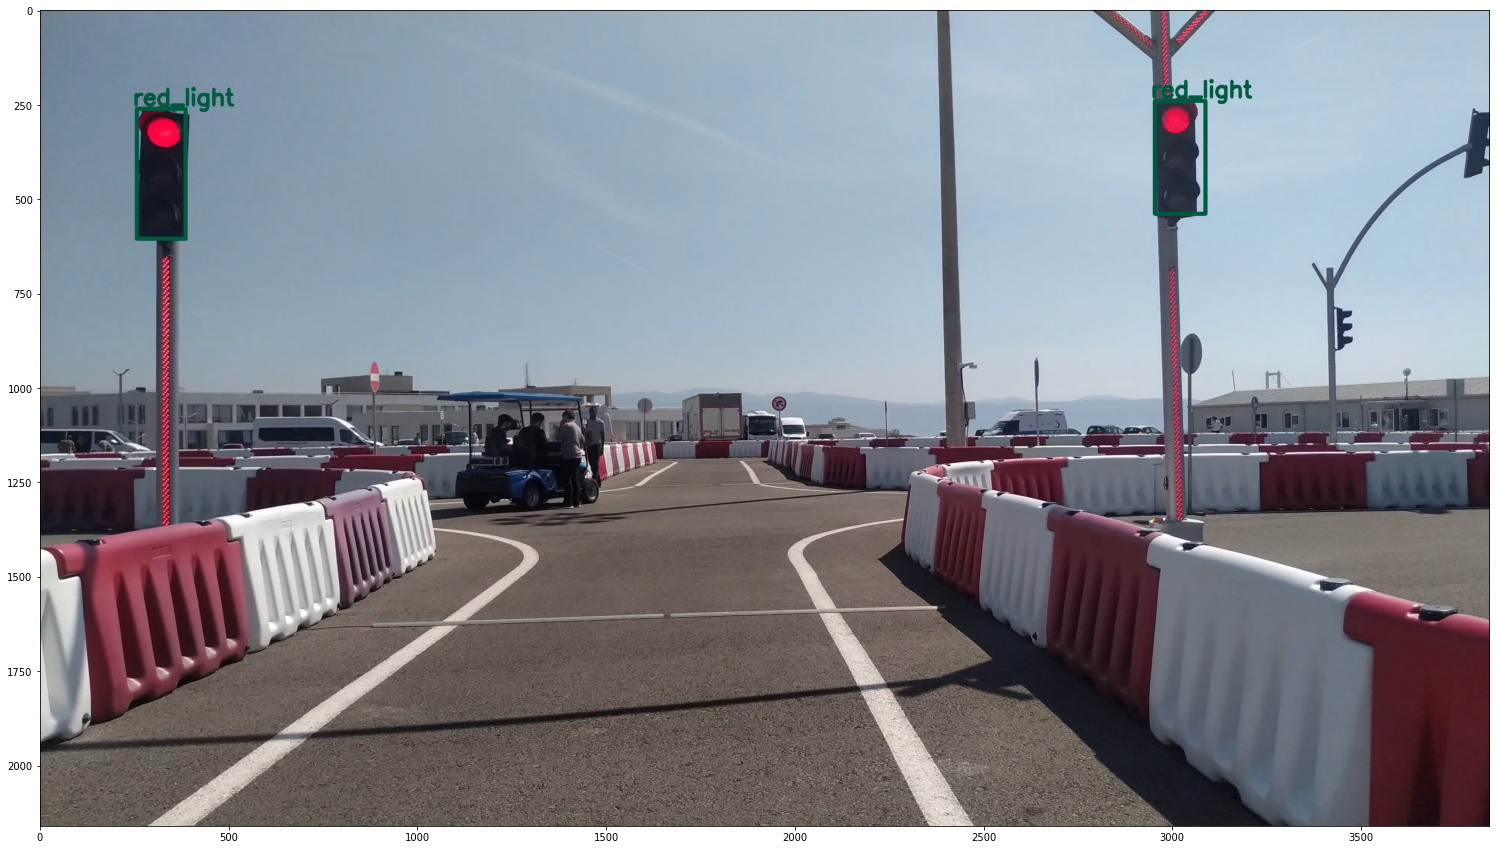

In [11]:
img,boxes = boxesFromYOLO(imagePath,labelPath)
showBoxes(img,boxes)

(2160, 3840, 3)


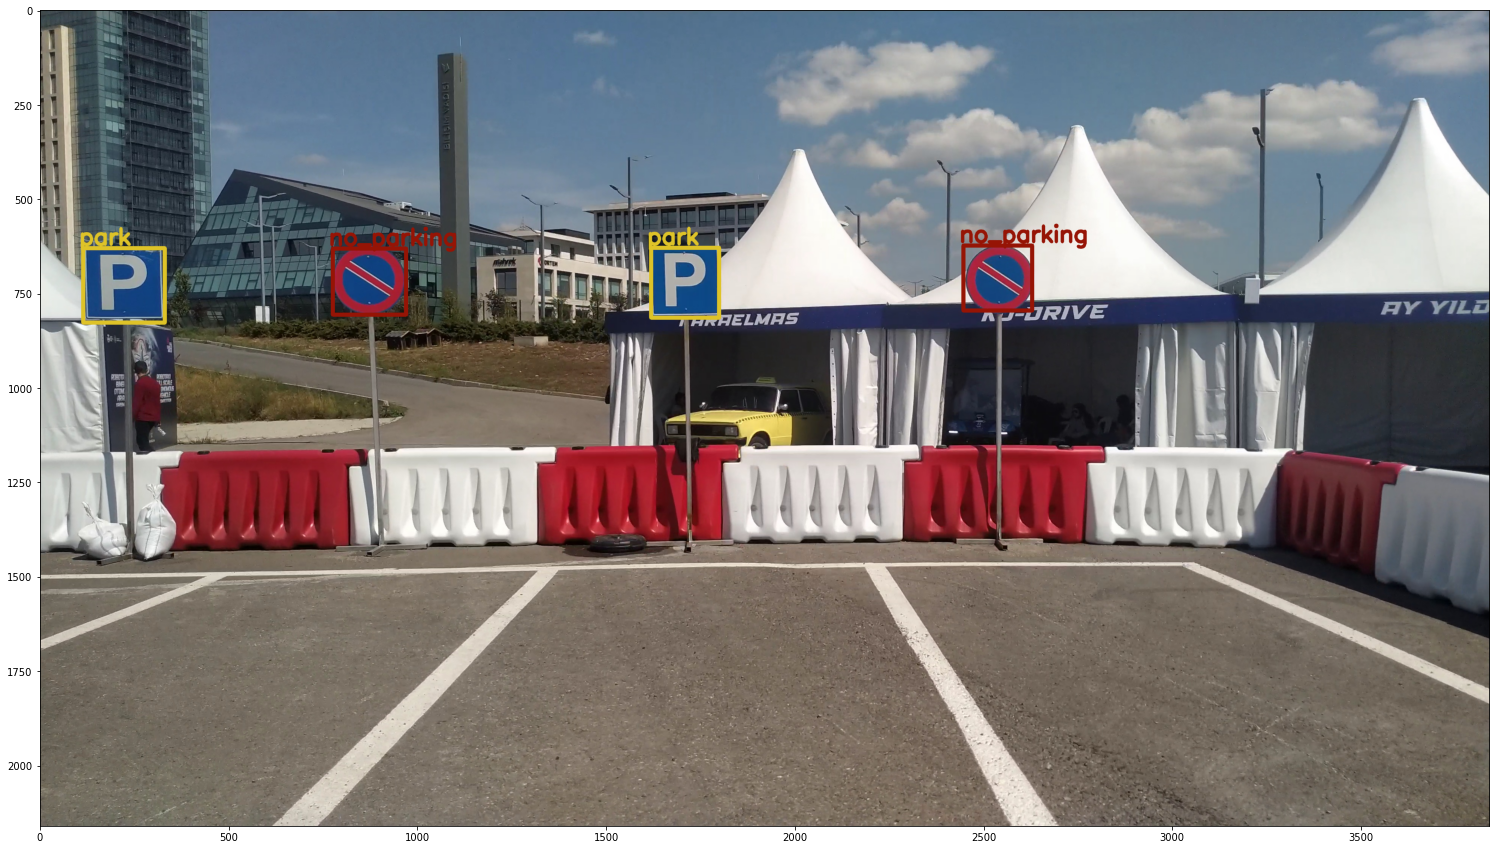

In [12]:
image = image_paths[1322]
image = image.split('.jpg')
label = image[0].replace("images","labels")
imagePath=os.path.join(f'{image[0]}.jpg')
labelPath = os.path.join(f'{label}.txt')
img,boxes = boxesFromYOLO(imagePath,labelPath)
showBoxes(img,boxes)